# Tensorflow EX--8 Part-1

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
#Normalize data (formullas for normalize data is   (x-x.min())/(x.max()-x.min()))
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# Tensorflow EX-8 Part-2

In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
#convert numerical columns
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [13]:
# #convert categorical column
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C','D'])


In [14]:
#if columns is more then use hash bucket
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

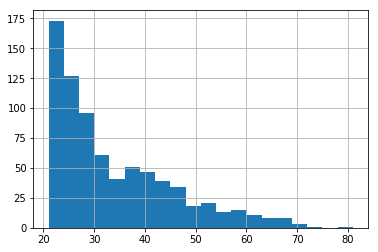

In [16]:
diabetes['Age'].hist(bins=20)

In [17]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])
age_bucket

BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

# Tensorflow EX-8 Part-3

In [18]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [19]:
#Train_test_split
x_data = diabetes.drop('Class', axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data,labels, test_size=0.3, random_state=101)

In [23]:
y_test.head()

766    1
748    1
42     0
485    1
543    0
Name: Class, dtype: int64

In [24]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [25]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

W0715 15:20:10.975378 139695459858240 estimator.py:1811] Using temporary folder as model directory: /tmp/tmp2nep5u4j


In [26]:
model.train(input_fn=input_func, steps=1000)

W0715 15:20:11.286632 139695459858240 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0715 15:20:11.333457 139695459858240 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0715 15:20:11.339568 139695459858240 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow_estimator/python/estimator/inputs/q

# Tensorflow EX-8 Part-4

In [27]:
#Evaluate model
eval_input_punc = tf.estimator.inputs.pandas_input_fn(x = x_test, y=y_test, batch_size = 10, num_epochs=1, shuffle=False)

In [28]:
results = model.evaluate(eval_input_punc)

W0715 15:20:17.942780 139695459858240 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0715 15:20:18.251830 139695459858240 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0715 15:20:18.272418 139695459858240 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0715 15:20:18.414828 139695459858240 deprecation.py:323] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to

In [29]:
results

{'accuracy': 0.72727275,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7969959,
 'auc_precision_recall': 0.6419452,
 'average_loss': 0.5269825,
 'label/mean': 0.35064936,
 'loss': 5.072206,
 'precision': 0.640625,
 'prediction/mean': 0.35854697,
 'recall': 0.50617284,
 'global_step': 1000}

In [30]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=10, num_epochs= 1, shuffle=False )

In [31]:
predictions = model.predict(pred_input_func)

In [32]:
my_pred=list(predictions)

In [33]:
my_pred

[{'logits': array([-0.06671262], dtype=float32),
  'logistic': array([0.48332804], dtype=float32),
  'probabilities': array([0.51667196, 0.483328  ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([0.48235464], dtype=float32),
  'logistic': array([0.6183037], dtype=float32),
  'probabilities': array([0.38169625, 0.6183037 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},
 {'logits': array([-0.533213], dtype=float32),
  'logistic': array([0.36976784], dtype=float32),
  'probabilities': array([0.63023216, 0.3697678 ], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object)},

# Tensorflow EX-8 Part-6   DNN Clasifier

In [34]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

W0715 15:20:20.791624 139695459858240 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpkzko937b


In [35]:
dnn_model.train(input_fn=input_func, steps=1000)

W0715 15:20:20.879343 139695459858240 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0715 15:20:21.916504 139695459858240 deprecation.py:506] From /home/manish/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/adagrad.py:76: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=x_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [37]:
dnn_model.evaluate(eval_input_func)

W0715 15:20:25.601841 139695459858240 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0715 15:20:25.617527 139695459858240 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8349794,
 'auc_precision_recall': 0.71481955,
 'average_loss': 0.47772783,
 'label/mean': 0.35064936,
 'loss': 4.59813,
 'precision': 0.6805556,
 'prediction/mean': 0.32386404,
 'recall': 0.60493827,
 'global_step': 1000}